In [1]:
from Pipeline import PipeLine
from DataSplit import DataSplit

/Users/julius/repos/BD-Project/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pipeline = PipeLine(DataSplit.TRAIN)

24/03/13 15:17:39 WARN Utils: Your hostname, Juliuss-MacBook-Pro-2.local resolves to a loopback address: 127.0.0.1; using 172.18.14.183 instead (on interface en0)
24/03/13 15:17:39 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/03/13 15:17:39 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
df = pipeline.run()

24/03/13 15:17:43 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , product_id, product_parent, product_title, vine, verified_purchase, review_headline, review_body, review_date, marketplace_id, product_category_id, label
 Schema: id, product_id, product_parent, product_title, vine, verified_purchase, review_headline, review_body, review_date, marketplace_id, product_category_id, label
Expected: id but found: 
CSV file: file:///Users/julius/repos/BD-Project/data/train-7.csv
24/03/13 15:17:43 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , product_id, product_parent, product_title, vine, verified_purchase, review_headline, review_body, review_date, marketplace_id, product_category_id, label
 Schema: id, product_id, product_parent, product_title, vine, verified_purchase, review_headline, review_body, review_date, marketplace_id, product_category_id, label
Expected: id but found: 
CSV file: file:///Users/julius/repos/BD-Project/data/

CodeCache: size=131072Kb used=23064Kb max_used=23064Kb free=108007Kb
 bounds [0x00000001079e0000, 0x0000000109090000, 0x000000010f9e0000]
 total_blobs=9123 nmethods=8193 adapters=842
 compilation: disabled (not enough contiguous free space left)
Removed 0 duplicate rows.


In [4]:
df.show()

24/03/13 15:17:45 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , product_id, product_parent, product_title, vine, verified_purchase, review_headline, review_body, review_date, marketplace_id, product_category_id, label
 Schema: id, product_id, product_parent, product_title, vine, verified_purchase, review_headline, review_body, review_date, marketplace_id, product_category_id, label
Expected: id but found: 
CSV file: file:///Users/julius/repos/BD-Project/data/train-6.csv


+---+----------+--------------+--------------------+----+-----------------+--------------------+--------------------+-----------+--------------+-------------------+-----+---------------+-------------+-------------+
| id|product_id|product_parent|       product_title|vine|verified_purchase|     review_headline|         review_body|review_date|marketplace_id|product_category_id|label|review_language|review_length|header_length|
+---+----------+--------------+--------------------+----+-----------------+--------------------+--------------------+-----------+--------------+-------------------+-----+---------------+-------------+-------------+
|  1|B00FAPF5U0|      46324555|    Candy Crush Saga|   N|                Y|brilliant but ann...|I took ages to si...| 2013-11-13|             1|                  1|False|             en|          160|           22|
|  4|0141319135|     871827197|Percy Jackson and...|   N|                N|                NULL|Sadly I am still ...| 2010-03-23|           

In [5]:
sampled_data = df\
    .sample(withReplacement=False, fraction=0.1, seed=42)\
    .toPandas()

24/03/13 15:17:46 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , product_id, product_parent, product_title, vine, verified_purchase, review_headline, review_body, review_date, marketplace_id, product_category_id, label
 Schema: id, product_id, product_parent, product_title, vine, verified_purchase, review_headline, review_body, review_date, marketplace_id, product_category_id, label
Expected: id but found: 
CSV file: file:///Users/julius/repos/BD-Project/data/train-7.csv
24/03/13 15:17:46 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , product_id, product_parent, product_title, vine, verified_purchase, review_headline, review_body, review_date, marketplace_id, product_category_id, label
 Schema: id, product_id, product_parent, product_title, vine, verified_purchase, review_headline, review_body, review_date, marketplace_id, product_category_id, label
Expected: id but found: 
CSV file: file:///Users/julius/repos/BD-Project/data/

In [6]:
df.show()

+---+----------+--------------+--------------------+----+-----------------+--------------------+--------------------+-----------+--------------+-------------------+-----+---------------+-------------+-------------+
| id|product_id|product_parent|       product_title|vine|verified_purchase|     review_headline|         review_body|review_date|marketplace_id|product_category_id|label|review_language|review_length|header_length|
+---+----------+--------------+--------------------+----+-----------------+--------------------+--------------------+-----------+--------------+-------------------+-----+---------------+-------------+-------------+
|  1|B00FAPF5U0|      46324555|    Candy Crush Saga|   N|                Y|brilliant but ann...|I took ages to si...| 2013-11-13|             1|                  1|False|             en|          160|           22|
|  4|0141319135|     871827197|Percy Jackson and...|   N|                N|                NULL|Sadly I am still ...| 2010-03-23|           

24/03/13 15:17:49 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , product_id, product_parent, product_title, vine, verified_purchase, review_headline, review_body, review_date, marketplace_id, product_category_id, label
 Schema: id, product_id, product_parent, product_title, vine, verified_purchase, review_headline, review_body, review_date, marketplace_id, product_category_id, label
Expected: id but found: 
CSV file: file:///Users/julius/repos/BD-Project/data/train-6.csv


<Axes: xlabel='review_language'>

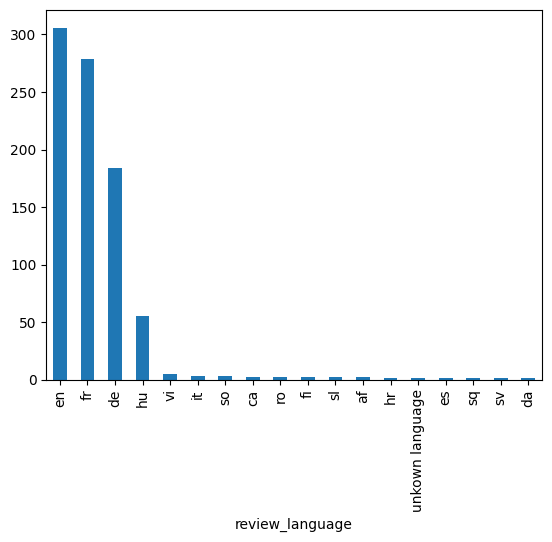

In [7]:
sampled_data["review_language"].value_counts().plot(kind='bar')

In [8]:
m = sampled_data["review_language"] == "sq"
sampled_data[m]

,id,product_id,product_parent,product_title,vine,verified_purchase,review_headline,review_body,review_date,marketplace_id,product_category_id,label,review_language,review_length,header_length
715,8535,B001F1CL1E,593358394,The Traveling Wilburys Collection,N,Y,Five Stars,like this,2015-06-22,1,12,False,sq,9,10


In [24]:
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline as SparkPipeline
from pyspark.ml import PipelineModel
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator


In [25]:
spark = SparkSession.builder.appName("RandomForestExample").getOrCreate()


In [26]:
# List of your feature columns
featureColumns = ["review_length", "header_length"]

# Assemble the feature columns into a single feature vector
assembler = VectorAssembler(inputCols=featureColumns, outputCol="features")


In [27]:
# If "label" is not a numeric column, convert it to numeric using StringIndexer
labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(df)


In [28]:
(trainingData, testData) = df.randomSplit([0.7, 0.3]) # before we submit, we want to train on all training data though.


In [29]:
# Configure the Random Forest model
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="features", numTrees=10)

# Chain indexers and forest in a Pipeline
pipeline = SparkPipeline(stages=[labelIndexer, assembler, rf])

# Train model
model = pipeline.fit(trainingData)
# save the model
# model.save("model")


24/03/13 15:24:38 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , product_id, product_parent, product_title, vine, verified_purchase, review_headline, review_body, review_date, marketplace_id, product_category_id, label
 Schema: id, product_id, product_parent, product_title, vine, verified_purchase, review_headline, review_body, review_date, marketplace_id, product_category_id, label
Expected: id but found: 
CSV file: file:///Users/julius/repos/BD-Project/data/train-6.csv
24/03/13 15:24:40 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , product_id, product_parent, product_title, vine, verified_purchase, review_headline, review_body, review_date, marketplace_id, product_category_id, label
 Schema: id, product_id, product_parent, product_title, vine, verified_purchase, review_headline, review_body, review_date, marketplace_id, product_category_id, label
Expected: id but found: 
CSV file: file:///Users/julius/repos/BD-Project/data/

In [30]:
import os
if "model" in os.listdir():
    # delete model dir
    os.system("rm -r model")
model.save("model")

In [31]:
model = PipelineModel.load("model")

NameError: name 'Pip' is not defined

In [ ]:
predictions = model.transform(testData)

# Select example rows to display
predictions.select("prediction", "indexedLabel", "features").show(5)


In [ ]:
evaluator = BinaryClassificationEvaluator(labelCol="indexedLabel")
accuracy = evaluator.evaluate(predictions)
print(f"accuracy: {accuracy}")
